In [29]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(['dark_background'])

import json

with open('../statistical_number_theory/data/prime10k.json') as f:
    primes = json.load(f)

how do you get cool patterns?
- what happens if you choose random values for f theta and amp?
- do it with different shaped waves (like circular ripples)

**How to make cool dynamical system out of this (make wave components move??)**
    - and how to make equation for this??
    
Auditory 'adiolization' of visuals

what happens when PCA on it? -- explicitly relate to frequency decompositions (interference patterns) you started with

ising model on interference patterns?


## Black interference and implications for neural oscillations?

Resources
- [maybe of interest](https://www.physicsclassroom.com/class/light/Lesson-3/The-Path-Difference)

In [38]:
def plot_im(mat, cmap='gray'):
    plt.imshow(mat, cmap=cmap)
    plt.axis('off')

def rotate(x, y, theta, center=(0,0)):
    """
    """
    sin,cos = np.sin(theta), np.cos(theta)
    
    #translation
    x -= center[0]
    y -= center[1]
    
    #rotate point
    x_new = x*cos - y*sin
    y_new = x*sin + y*cos #cool stuff happens if you do subtraction instead
    
    # translate point back
    x = x_new + center[0]
    y = y_new + center[1]
    
    return (x,y)


def sin_grating(f=1, theta=0, a=1, num=500):
    """
    kindof like a visual neuron orientation filter
    f     : frequency
    theta : angle in radians
    amp   : amplitude
    """
    x_set = np.linspace(-5,5,num)
    y_set = np.linspace(-5,5,num)

    xs = np.array([x_set for i in range(num)]).flatten()
    ys = np.array([[i for j in range(num)] for i in y_set ]).flatten()

    if theta:
        xs, ys = rotate(xs, ys, theta)
        
    z = []
    xs = xs.reshape((num,num))
    for x_vec in xs:
        z.append(a*np.sin(f*x_vec))
    return np.array(z)


def combine_pats(fs, thetas, amps, num=1000, show_bases=True):
    # start with layer 0
    pattern = sin_grating(fs[0], thetas[0], amps[0], num)
    bases = [pattern.copy(), ]
    for f, t, a in zip(fs[1:], thetas[1:], amps[1:]):
        g = sin_grating(f, t, a, num)
        bases.append(g)
        pattern += g
    
    if show_bases:
        plt.figure(figsize=(8,4))
        for i, b in enumerate(bases):
            plt.subplot(1, len(bases), i+1)
            plot_im(b)
            
    return pattern

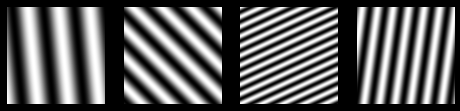

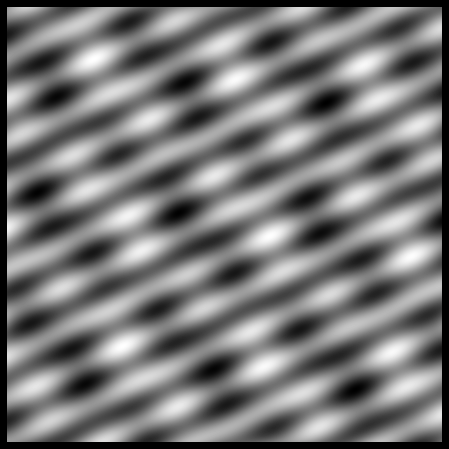

In [52]:
interference_pattern = combine_pats([2,3,7,4],
                                    [0.1, 3.14/4, 2, 3],
                                    [1,2,3,1])

plt.figure(figsize=(8,8))
plot_im(interference_pattern)
plt.show()

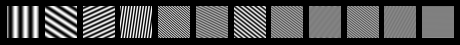

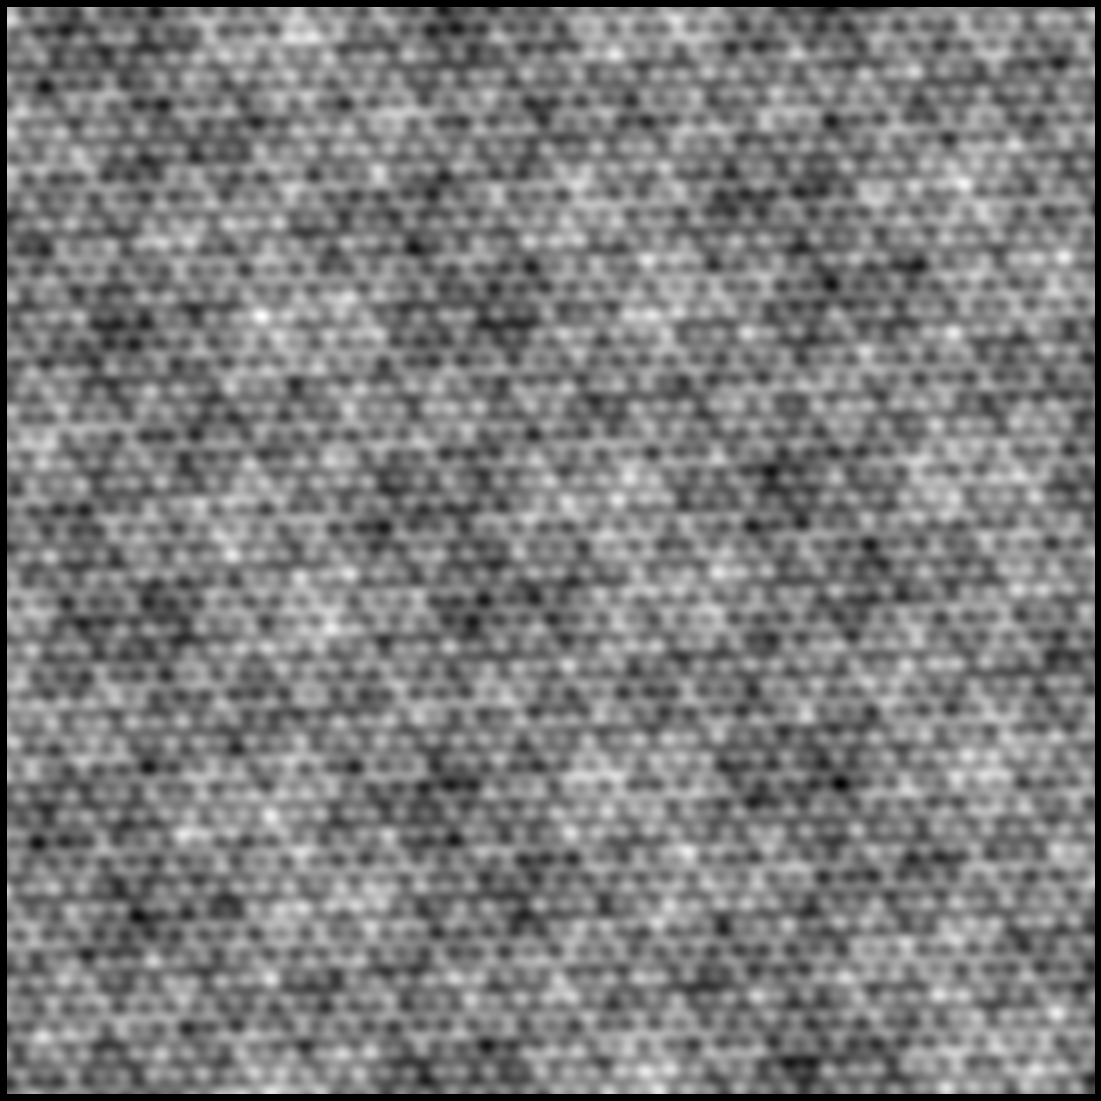

In [44]:
    

interference_pattern = combine_pats(primes[:12],
                                    range(12),
                                   [1 for i in range(12)])

plt.figure(figsize=(20,20))
plot_im(interference_pattern)
plt.show()